In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [192]:
df = pd.read_csv('hair_problem.csv')

df.rename(columns={
    "Timestamp": "timestamp",
    "What is your name ?": "name",
    "What is your age ?": "age",
    "What is your gender ?": "gender",
    "Do you have hair fall problem ?": "hair_fall",
    "Is there anyone in your family having a hair fall problem or a baldness issue?": "family_history",
    "Did you face any type of chronic illness in the past?": "chronic_illness",
    "Do you stay up late at night?": "late_night",
    "Do you have any type of sleep disturbance?": "sleep_disturbance",
    "Do you think that in your area water is a reason behind hair fall problems?": "water_reason",
    "Do you use chemicals, hair gel, or color in your hair?": "hair_chemicals",
    "Do you have anemia?": "anemia",
    "Do you have too much stress": "stress",
    "What is your food habit": "food_habit"
}, inplace=True)
df.drop(columns=['timestamp', 'name'], inplace=True)
df.head()

,age,gender,hair_fall,family_history,chronic_illness,late_night,sleep_disturbance,water_reason,hair_chemicals,anemia,stress,food_habit
0,22,Male,Yes,Yes,Yes,Yes,No,No,No,Yes,Yes,Both
1,18,Male,No,No,No,No,No,Yes,Yes,No,No,Both
2,25,Male,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Both
3,17,Male,No,No,No,Yes,No,Yes,No,Yes,Yes,Both
4,28,Male,No,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Nutritious


In [193]:
### check null values
df.isnull().sum()

age                  0
gender               0
hair_fall            0
family_history       0
chronic_illness      0
late_night           0
sleep_disturbance    0
water_reason         0
hair_chemicals       0
anemia               0
stress               0
food_habit           0
dtype: int64

## Mapping / Encoding

In [194]:
## label encode hair_fall 1=yes, 0=no
df['hair_fall'] = df['hair_fall'].map({'No': 0, 'Yes': 1})

## Methods

In [195]:
# SNS contingency bar plot
def plot_contingency_bar(column, target='hair_fall'):
    plt.figure(figsize=(10,6))
    sns.barplot(x=column, y=target, data=df)
    plt.show()

    corr = df[[column, target]].corr()
    print(corr)

In [196]:
# chi2 results
def chi2(column, target='hair_fall'):
    contingency_table = df.groupby([column, target]).size().unstack(target)
    print(contingency_table)
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f'Chi2: {chi2}, p-value: {p}')
    print(f'Degrees of freedom: {dof}')
    print(f'Expected frequencies: {expected}')

In [197]:
def sns_catplot(column, target='hair_fall'):
    sns.catplot(x=column, hue=target, data=df, kind='count')

# EDA

## Overzicht alle kolommen counts

### Catplots vs Hair fall

In [198]:
df['hair_chemicals'] = df['hair_chemicals'].replace({'Yea': 'Yes'})
df['stress'] = df['stress'].replace({r'\\No': 'No'}, regex=True)

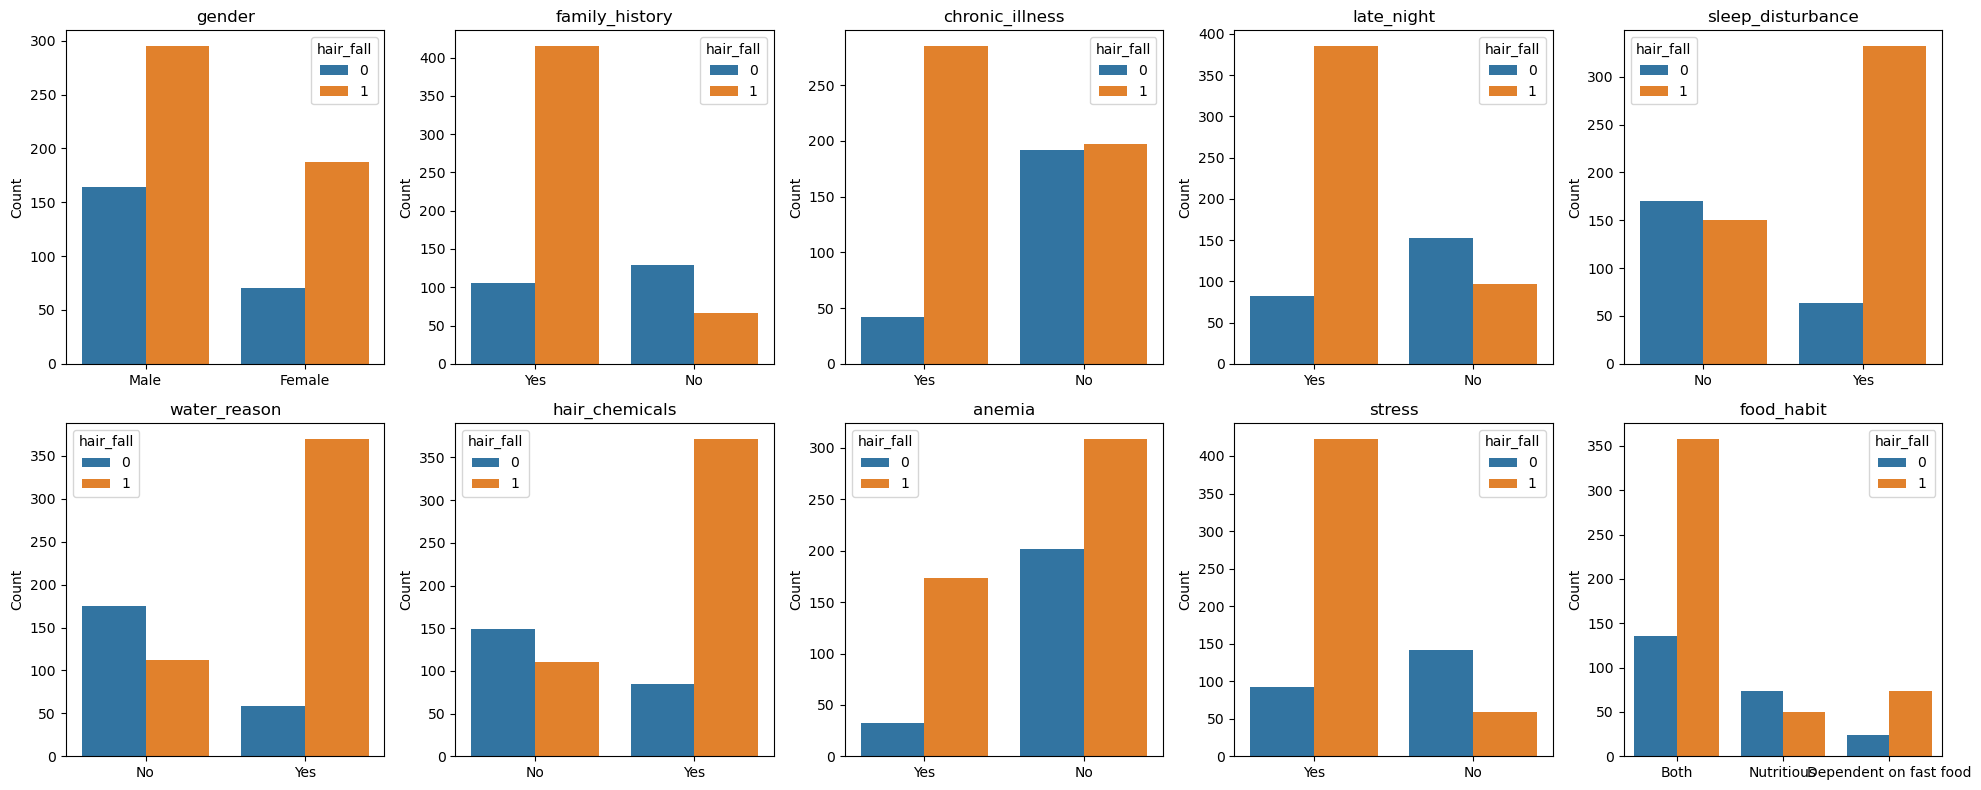

In [199]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lijst van kolommen die je wil plotten
columns = [
    "gender", "family_history", "chronic_illness", "late_night", "sleep_disturbance",
    "water_reason", "hair_chemicals", "anemia", "stress", "food_habit"
]

target = "hair_fall"

# Maak een grid van 2 rijen en 5 kolommen
fig, axes = plt.subplots(2, 5, figsize=(20, 8))  # pas figsize aan voor grotere plots
axes = axes.flatten()  # maakt een 1D-array van alle assen, makkelijker te loopen

for ax, column in zip(axes, columns):
    sns.countplot(x=column, hue=target, data=df, ax=ax)
    ax.set_title(column)
    ax.set_xlabel("")  # optioneel: geen x-label
    ax.set_ylabel("Count")  # optioneel: één uniforme y-label

plt.tight_layout()
plt.show()


### Contingency intervals

In [ ]:
# mapping all columns to values with labelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

df.head()
# Yes = 1, No = 0
# Gender: 1 = Male, 0 = Female
# Food habit: 0 = Both, 1 = Dependant on fast food, 2 = Nutricious 

,age,gender,hair_fall,family_history,chronic_illness,late_night,sleep_disturbance,water_reason,hair_chemicals,anemia,stress,food_habit
0,22,1,1,1,1,1,0,0,0,1,1,0
1,18,1,0,0,0,0,0,1,1,0,0,0
2,25,1,1,1,1,0,0,1,0,0,1,0
3,17,1,0,0,0,1,0,1,0,1,1,0
4,28,1,0,1,1,1,0,1,0,1,1,2


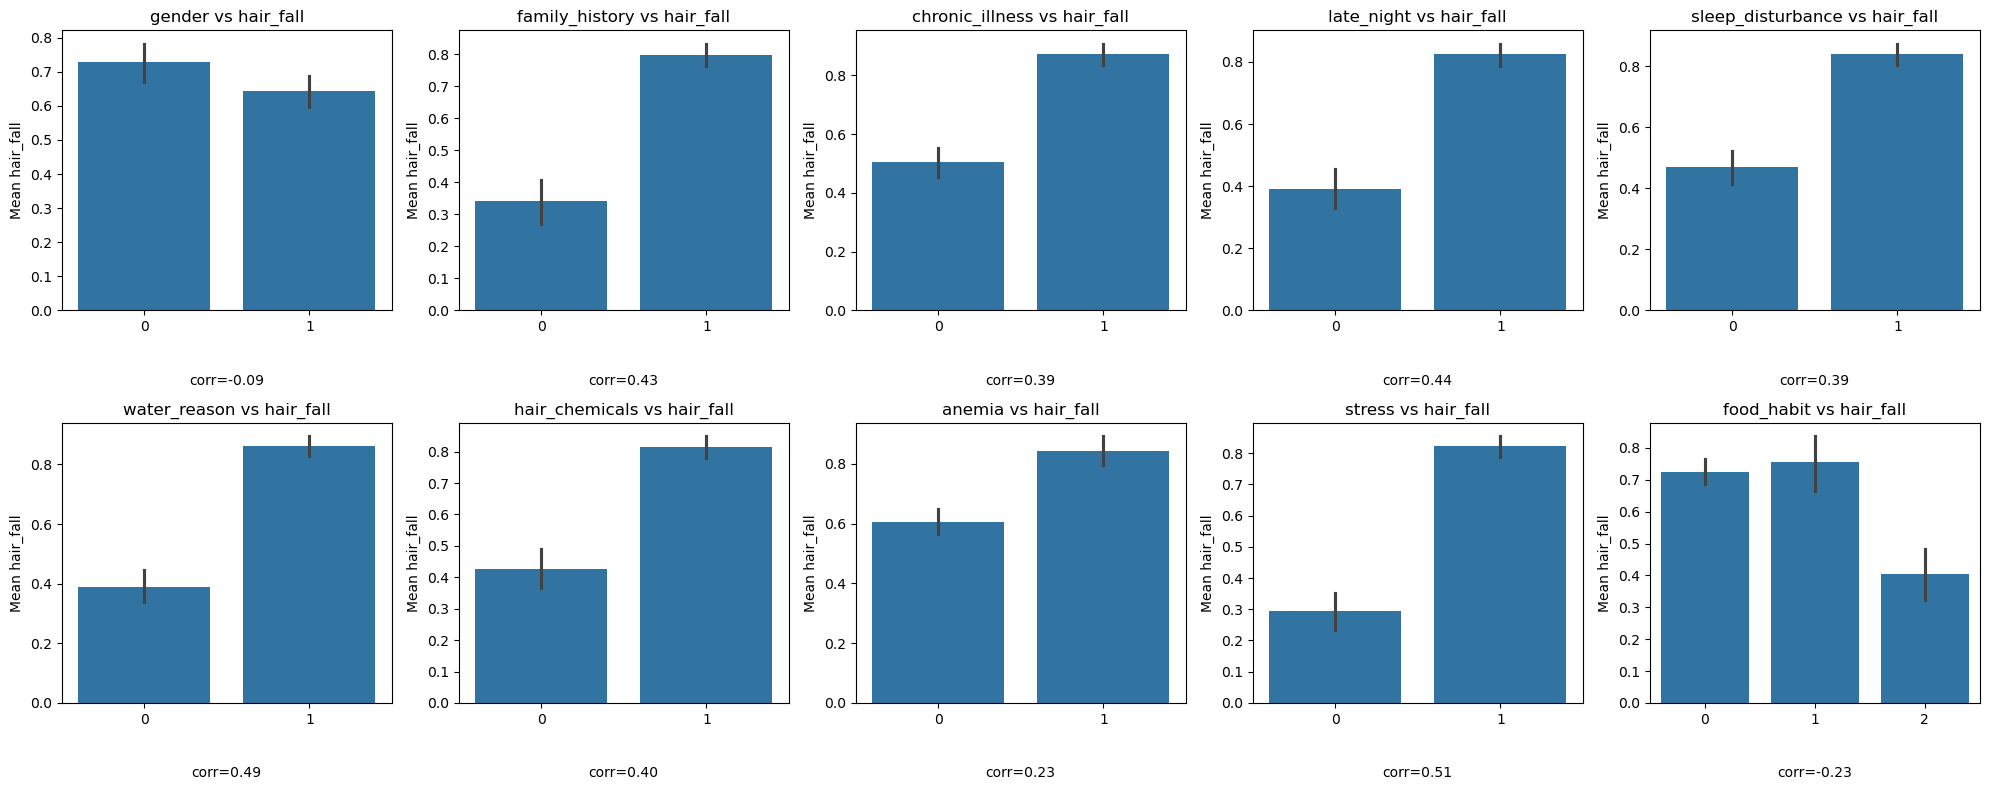

In [201]:
columns = [
    "gender", "family_history", "chronic_illness", "late_night", "sleep_disturbance",
    "water_reason", "hair_chemicals", "anemia", "stress", "food_habit"
]

target = "hair_fall"

fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()

for ax, column in zip(axes, columns):
    sns.barplot(x=column, y=target, data=df, ax=ax)
    ax.set_title(f"{column} vs {target}")
    ax.set_xlabel("")
    ax.set_ylabel("Mean " + target)

    # Correlatie berekenen en in de titel of onder de plot zetten
    corr = df[[column, target]].corr().iloc[0, 1]
    ax.text(0.5, -0.25, f"corr={corr:.2f}", ha="center", va="center", transform=ax.transAxes)

plt.tight_layout()
plt.show()


Relaties gevonden:
- family_history
- chronic_illness
- late_night
- sleep_disturbance
- water_reason
- hair_chemicalse
- anemia
- stress

No Relations:
- Gender slight overlap
- Food habit: 2 out of 3 categories overlap

## Age Exploration

In [202]:
# print age column summary
df['age'].describe()

count    716.000000
mean      24.121508
std        8.446825
min       15.000000
25%       21.000000
50%       24.000000
75%       27.000000
max      218.000000
Name: age, dtype: float64

Range van 15 - 35 jaar (ONZE DOELGROEP). 1 outlier verkeerde age ingevuld (218 jaar)

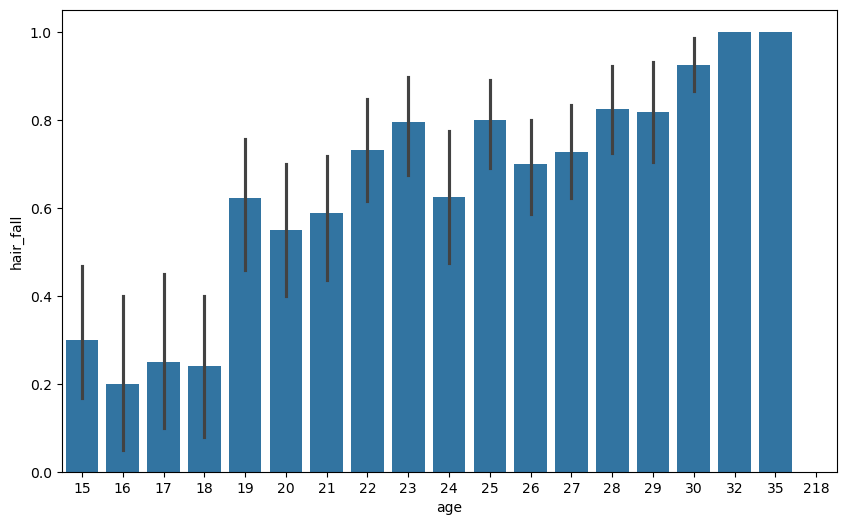

               age  hair_fall
age        1.00000    0.13914
hair_fall  0.13914    1.00000


In [205]:
plot_contingency_bar('age')

# Model

In [204]:
pred_col = ['hair_fall']
features = ['family_history', 'chronic_illness', 'late_night', 'sleep_disturbance', 'water_reason', 'hair_chemicals', 'anemia', 'stress']

@TODO:
- Remove age record with age 218
